<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/master/Assignment_1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import fashion_mnist
import tensorflow as tf
import tensorflow_datasets as tdfs
!pip install wandb
import wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.1 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=6d80eb476fba3c12bb56556b528ae9c4cd55cabff52551fbc0dfed79f488b551
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

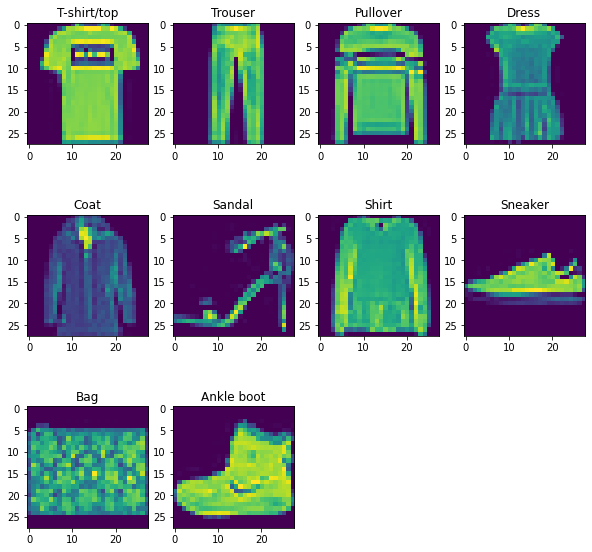

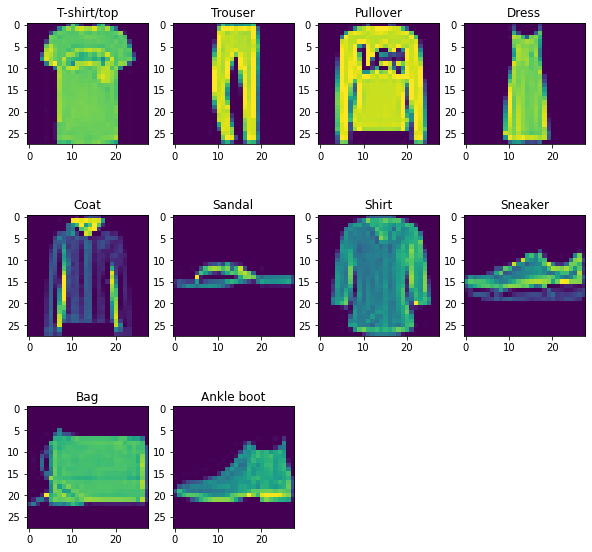

In [ ]:
#We will name Target names with  numbers
Targets = { 0: 'T-shirt/top',
          1: 'Trouser' ,
           2: 'Pullover',
          3: 'Dress',
         4: 'Coat' , 
          5: 'Sandal' , 
           6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag' , 
          9: 'Ankle boot' }

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
class Dataset:
    def __init__(self, X, Y):
      self.index= list(np.zeros((10, 1)))
      for i in range(10):
          self.index[i] =np.where(Y== i)[0][0]
    
    def plot_samples(self, X, Y):
      
      X = X.squeeze()
      plt.figure(figsize=(10, 10))

      for j, i in enumerate(self.index):
        i = i.astype(int)
        image = X[i].reshape(28, 28) 
        plt.subplot(3, 4, j+1)
        plt.imshow(image)
        plt.title(Targets[Y[i]])
      plt.show()
    
    def log_samples_inot_wandb(self, X, Y, p ='Images'):

        wandb.log({p: [wandb.Image(X[i], caption=Targets[Y[i]]) for i in self.index]})


wandb.init(project='Question_1_')

fmnist = Dataset(X_train, Y_train)
fmnist.plot_samples(X_train, Y_train)
fmnist.log_samples_inot_wandb(X_train, Y_train, p = 'Train Sample Images')

fmnist = Dataset(X_test, Y_test)
fmnist.plot_samples(X_test, Y_test)
fmnist.log_samples_inot_wandb(X_test, Y_test , p = 'Test Sample Images')